### **Lab 3**

Assignment Details:

1. Data Analysis
    - Univariate 
    - Bivariate 
    - Multivariate
2. Feauture Engineering
3. Ensemble methods
    - Bagging 
    - Boosting
    - Random Forests
4. Hyperparameter Tuning
5. Final System

## Preprocessing data

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [63]:


df = pd.read_csv("data/output_data.csv")
df = df.drop(columns=[df.columns[0]]) #Dropping ID column

print(df.columns)
print("-------------------------------")
print(df.shape)
print("-------------------------------")
print(df.head())

Index(['systolic', 'eyesight(left)', 'hearing(right)', 'ALT', 'relaxation',
       'Cholesterol', 'serum creatinine', 'AST', 'Gtp', 'hearing(left)',
       'smoking'],
      dtype='object')
-------------------------------
(159256, 11)
-------------------------------
   systolic  eyesight(left)  hearing(right)  ALT  relaxation  Cholesterol  \
0       135             0.5               1   25          87          172   
1       146             0.6               2   23          83          194   
2       118             0.4               1   31          75          178   
3       131             1.5               1   27          88          180   
4       121             1.5               1   13          76          155   

   serum creatinine  AST  Gtp  hearing(left)  smoking  
0               1.0   22   27              1        1  
1               1.1   27   37              2        0  
2               0.8   27   53              1        1  
3               1.0   20   30              1  

## Splitting Data

In [64]:
X = df.drop('smoking', axis=1)
y = df['smoking']

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (159256, 10), y shape: (159256,)


In [65]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(111479, 10)
(23889, 10)
(23888, 10)


## Step 1 | Data Analysis

In [66]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
159251    False
159252    False
159253    False
159254    False
159255    False
Length: 159256, dtype: bool

In [67]:
df.isnull().sum()

systolic            0
eyesight(left)      0
hearing(right)      0
ALT                 0
relaxation          0
Cholesterol         0
serum creatinine    0
AST                 0
Gtp                 0
hearing(left)       0
smoking             0
dtype: int64

### **1. Univariate Analysis**

Univariate data refers to a type of data in which each observation or data point corresponds to a single variable. In other words, it involves the measurement or observation of a single characteristic or attribute for each individual or item in the dataset. Analyzing univariate data is the simplest form of analysis in statistics.

1. Histogram per feature

Purpose: Show the frequency distribution of each feature.

array([[<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'hearing(right)'}>],
       [<Axes: title={'center': 'ALT'}>,
        <Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'AST'}>, <Axes: title={'center': 'Gtp'}>],
       [<Axes: title={'center': 'hearing(left)'}>,
        <Axes: title={'center': 'smoking'}>, <Axes: >]], dtype=object)

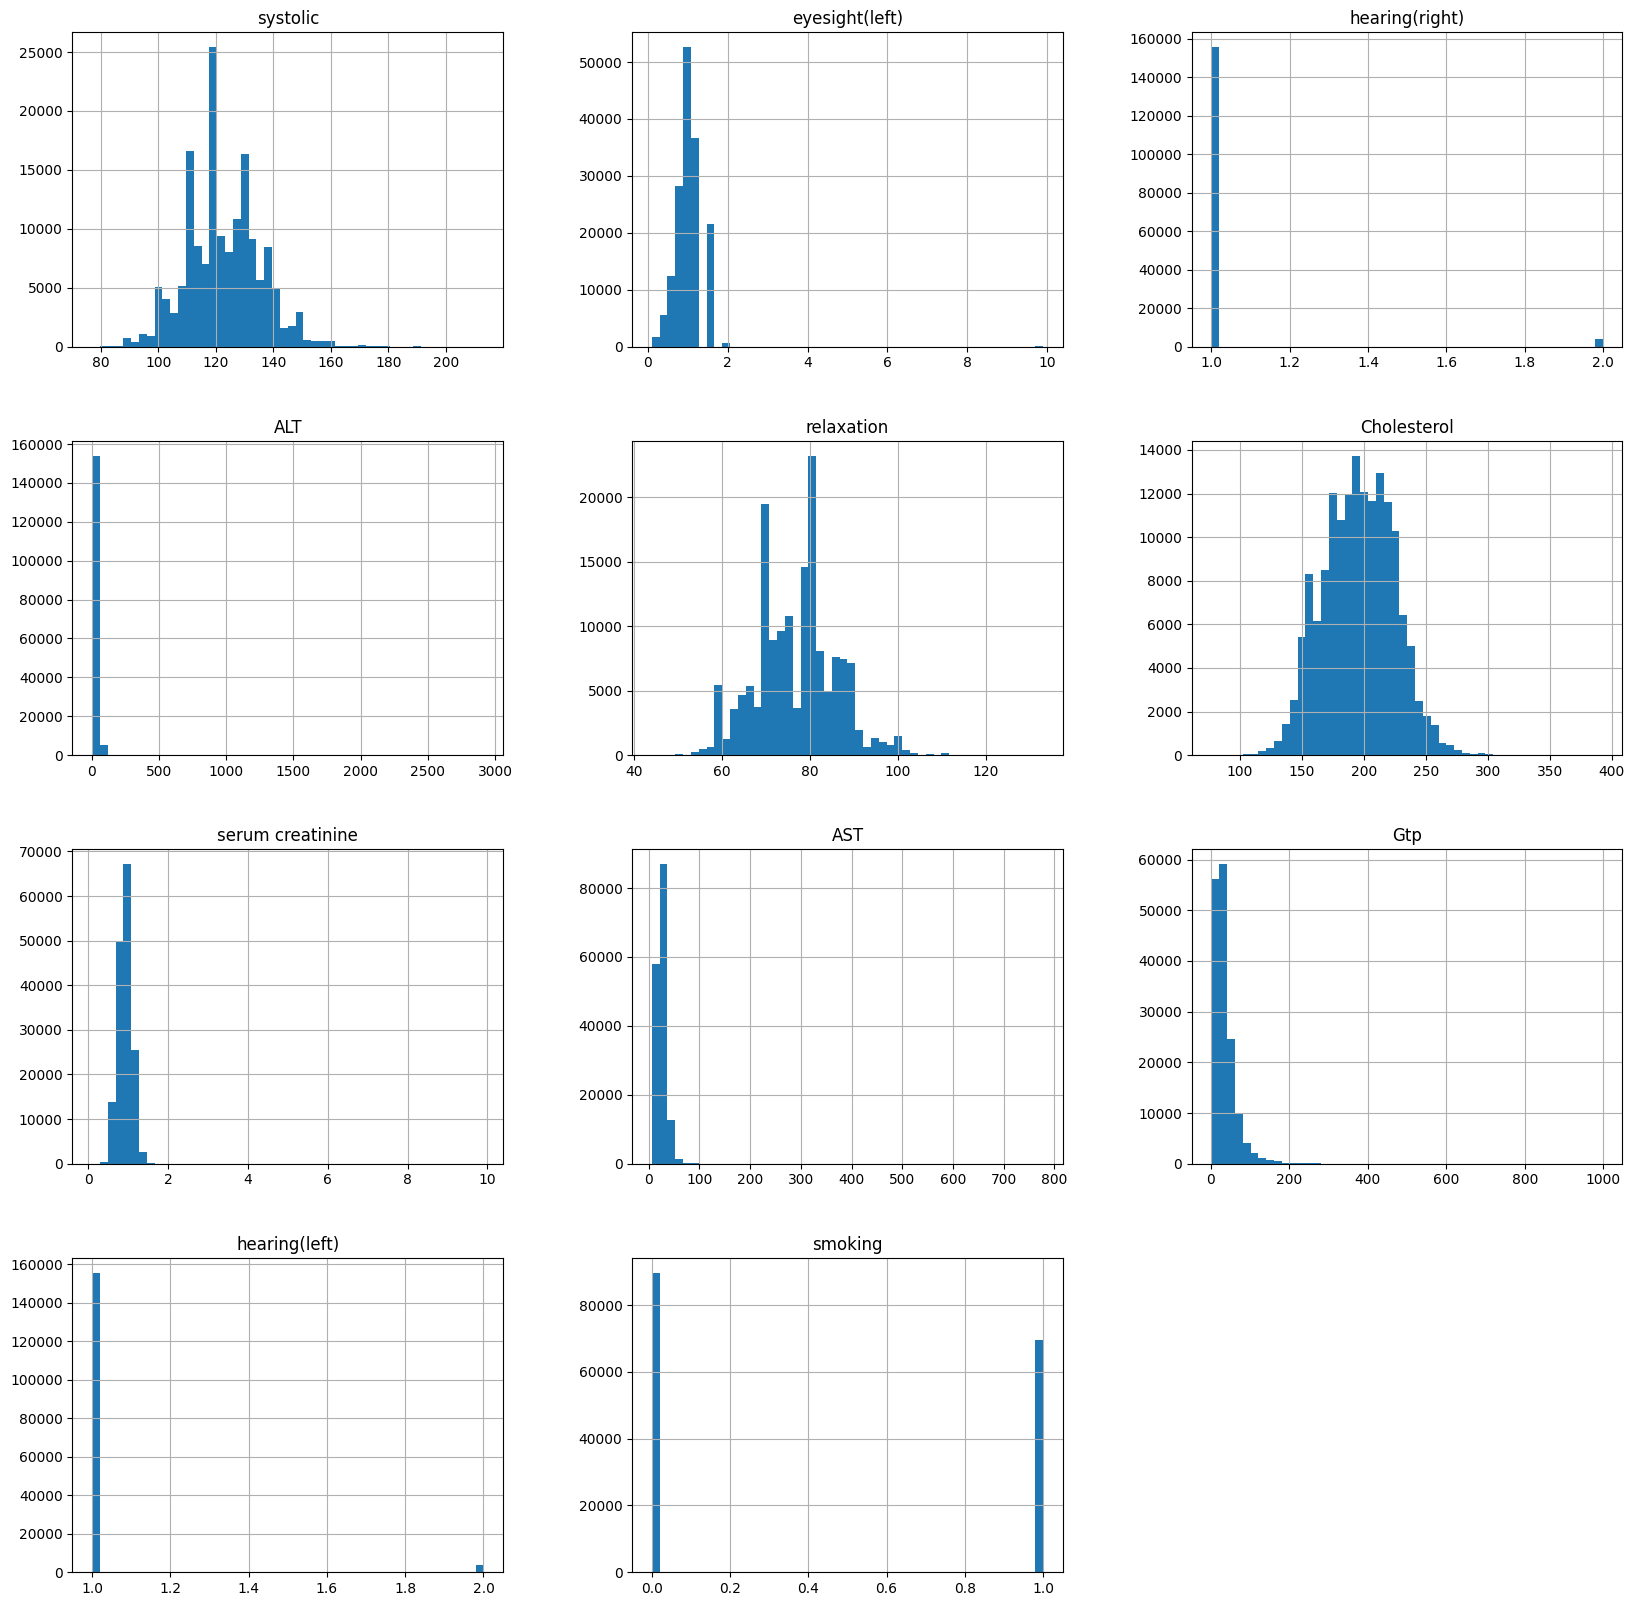

In [68]:
df.hist(bins=50, figsize=(20,20))

2. Summary statistics per feature

Purpose: Show key metrics like mean, median, standard deviation, etc

In [69]:
print(df.describe())

            systolic  eyesight(left)  hearing(right)            ALT  \
count  159256.000000   159256.000000   159256.000000  159256.000000   
mean      122.503648        1.005798        1.023421      26.550296   
std        12.729315        0.402113        0.151238      17.753070   
min        77.000000        0.100000        1.000000       1.000000   
25%       114.000000        0.800000        1.000000      16.000000   
50%       121.000000        1.000000        1.000000      22.000000   
75%       130.000000        1.200000        1.000000      32.000000   
max       213.000000        9.900000        2.000000    2914.000000   

          relaxation    Cholesterol  serum creatinine            AST  \
count  159256.000000  159256.000000     159256.000000  159256.000000   
mean       76.874071     195.796165          0.892764      25.516853   
std         8.994642      28.396959          0.179346       9.464882   
min        44.000000      77.000000          0.100000       6.000000   


3. Visualizing mean per feature

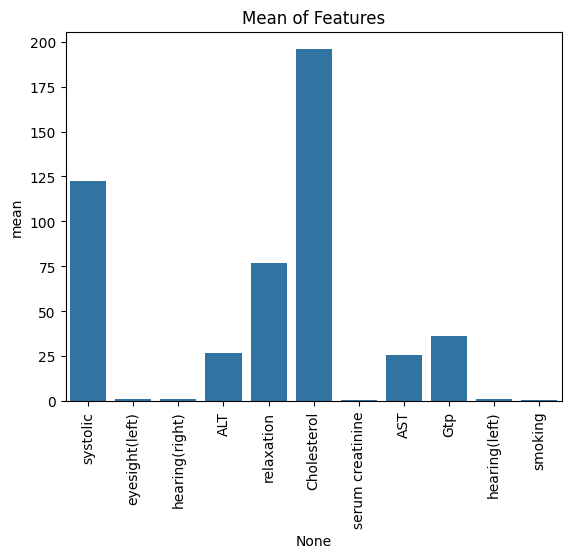

In [70]:
desc = df.describe().transpose() #transpose so that features are rows

sns.barplot(x=desc.index, y=desc['mean'])
plt.xticks(rotation=90)
plt.title('Mean of Features')
plt.show()

In [71]:
for column in df.columns:
    print(f"{column}: {df[column].unique()[0:20]}")

systolic: [135 146 118 131 121 150 137 130 105 107  95 120 113 111 155 138  97 124
 134 132]
eyesight(left): [0.5 0.6 0.4 1.5 1.2 0.7 0.8 1.  2.  0.9 0.3 0.1 0.2 9.9 1.9 1.6 1.1 1.8
 1.3 1.7]
hearing(right): [1 2]
ALT: [25 23 31 27 13 42 12 15 21 16 11 17 18 24 20 53 26 28 39 14]
relaxation: [87 83 75 88 76 95 91 80 70 60 73 65 72 84 81 94 82 56 77 90]
Cholesterol: [172 194 178 180 155 199 222 282 243 183 165 217 163 215 220 204 208 189
 201 158]
serum creatinine: [1.  1.1 0.8 0.7 0.9 1.3 1.2 0.5 0.4 0.6 1.4 1.6 1.5 1.7 0.1 1.8 2.5 3.
 1.9 0.2]
AST: [22 27 20 19 24 17 16 25 21 23 18 40 37 29 15 26 30 31 12 41]
Gtp: [ 27  37  53  30  17 119  16  31  14   8  15   9  36  26  33  11  22  44
  50  92]
hearing(left): [1 2]
smoking: [1 0]


Conclusion:
- hearing(left), hearing(right) are caterogical features

In [74]:
print(df.dtypes)
df['smoking'] = df['smoking'].astype('category')
df['hearing(left)'] = df['hearing(left)'].astype('category')
df['hearing(right)'] = df['hearing(right)'].astype('category')

systolic               int64
eyesight(left)       float64
hearing(right)      category
ALT                    int64
relaxation             int64
Cholesterol            int64
serum creatinine     float64
AST                    int64
Gtp                    int64
hearing(left)       category
smoking             category
dtype: object



Descriptive stats for systolic:
count    159256.000000
mean        122.503648
std          12.729315
min          77.000000
25%         114.000000
50%         121.000000
75%         130.000000
max         213.000000
Name: systolic, dtype: float64
Skewness of systolic: 0.21992481204281342
Kurtosis of systolic: 0.21205237030470858


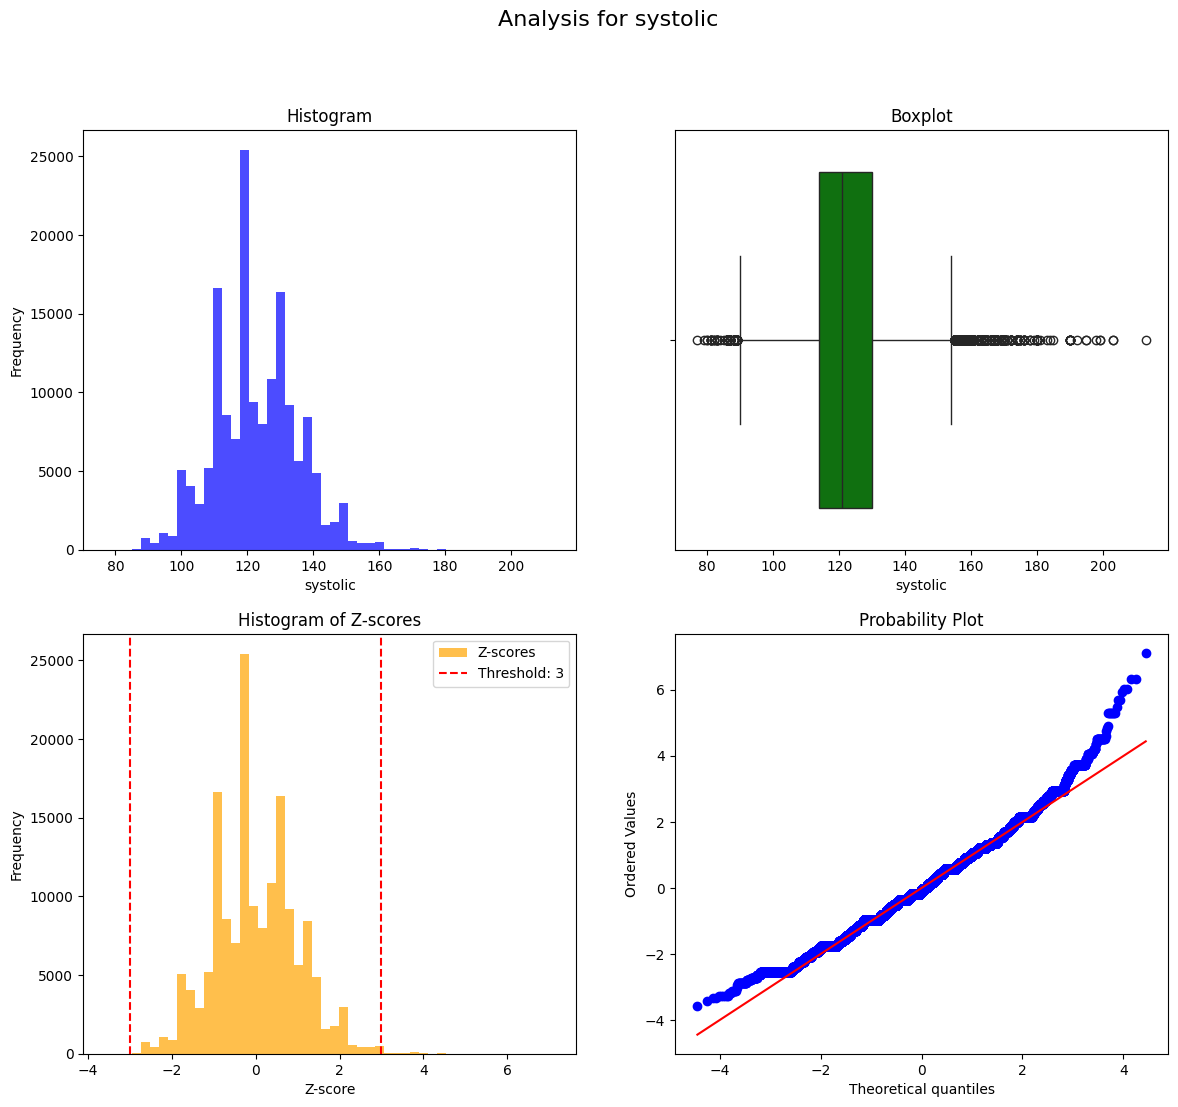

<Figure size 1000x600 with 0 Axes>


Descriptive stats for eyesight(left):
count    159256.000000
mean          1.005798
std           0.402113
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           9.900000
Name: eyesight(left), dtype: float64
Skewness of eyesight(left): 8.890572430701148
Kurtosis of eyesight(left): 196.4654686805755


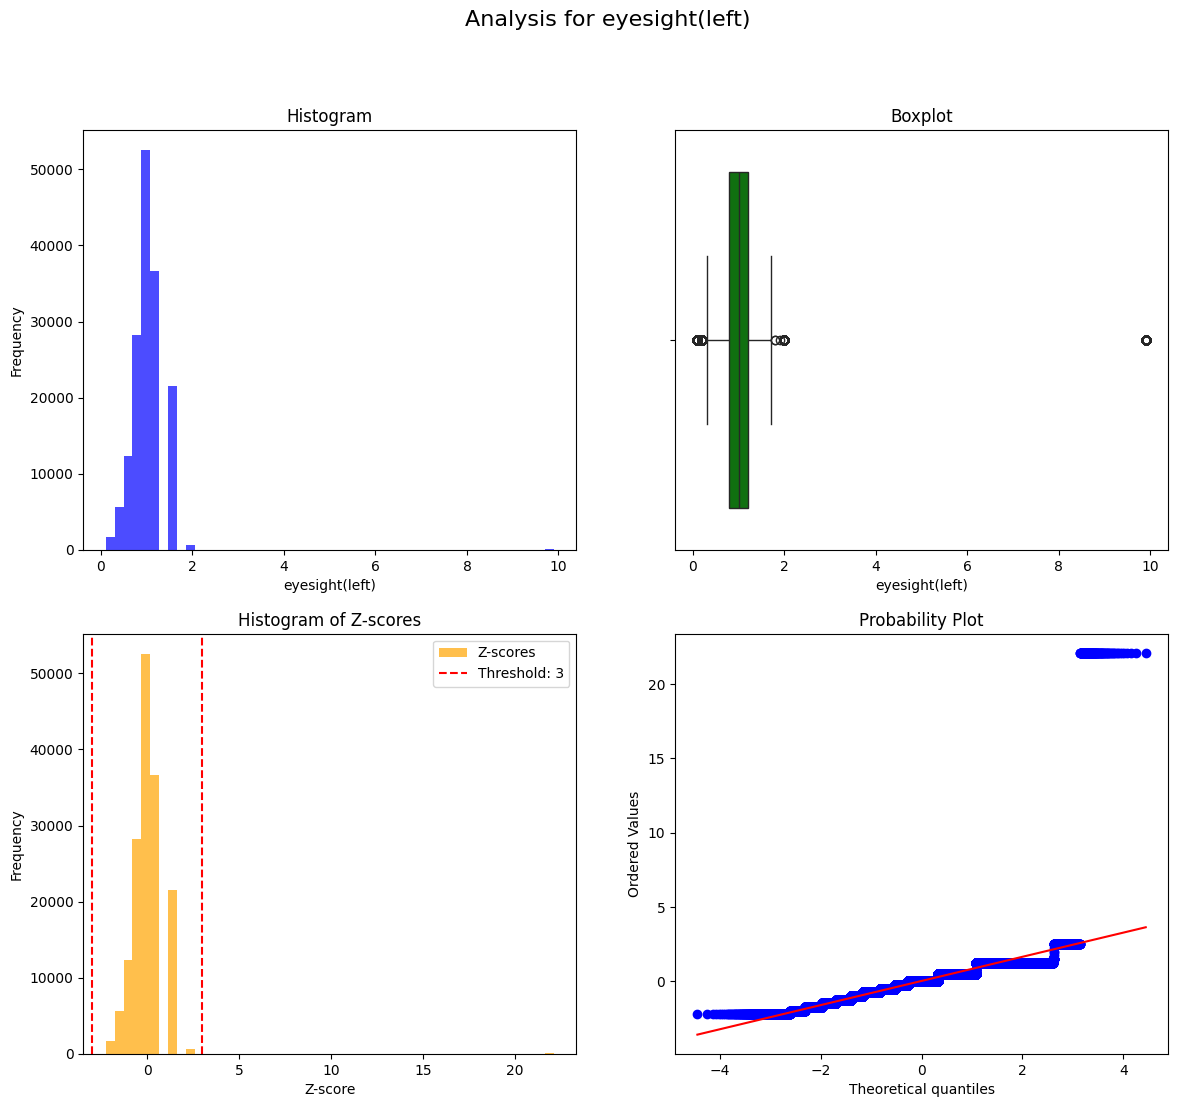

<Figure size 1000x600 with 0 Axes>

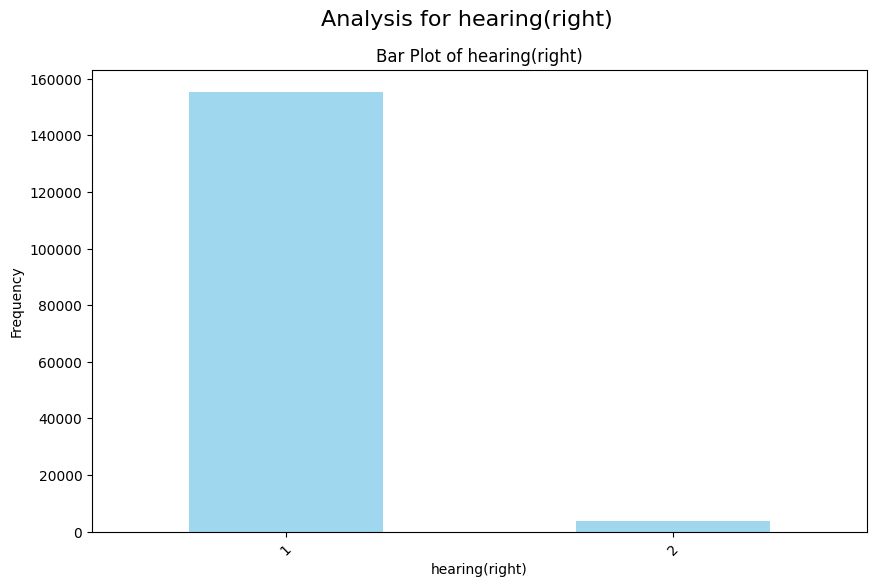


Value counts for hearing(right):
hearing(right)
1    155526
2      3730
Name: count, dtype: int64

Descriptive stats for ALT:
count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64
Skewness of ALT: 34.8300119320999
Kurtosis of ALT: 4870.241909045784


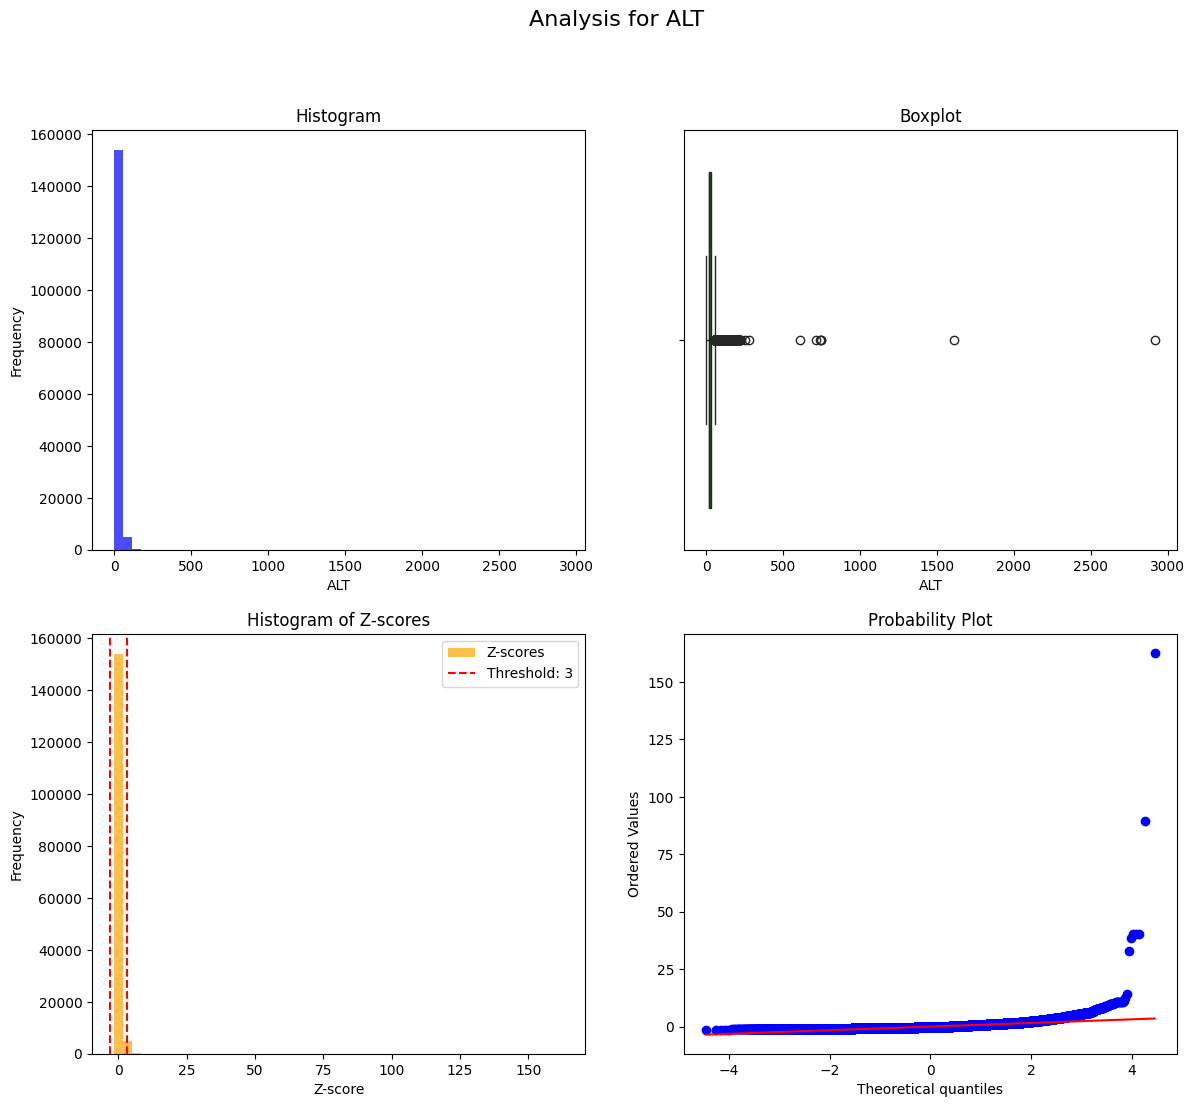

<Figure size 1000x600 with 0 Axes>


Descriptive stats for relaxation:
count    159256.000000
mean         76.874071
std           8.994642
min          44.000000
25%          70.000000
50%          78.000000
75%          82.000000
max         133.000000
Name: relaxation, dtype: float64
Skewness of relaxation: 0.17634977480941716
Kurtosis of relaxation: 0.14220138990160525


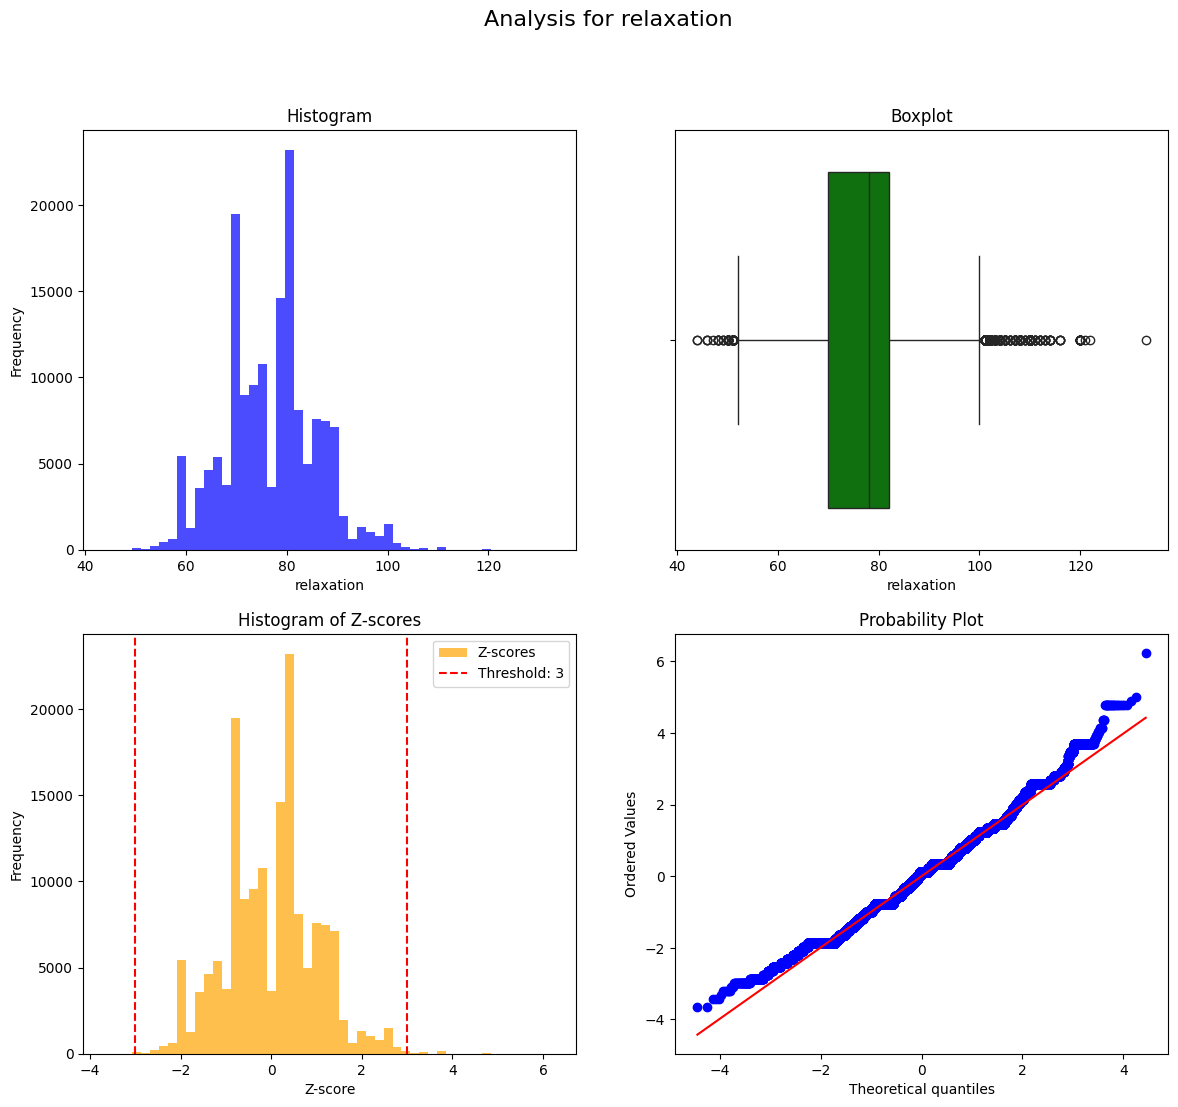

<Figure size 1000x600 with 0 Axes>


Descriptive stats for Cholesterol:
count    159256.000000
mean        195.796165
std          28.396959
min          77.000000
25%         175.000000
50%         196.000000
75%         217.000000
max         393.000000
Name: Cholesterol, dtype: float64
Skewness of Cholesterol: 0.043487788578322334
Kurtosis of Cholesterol: -0.20628096571151744


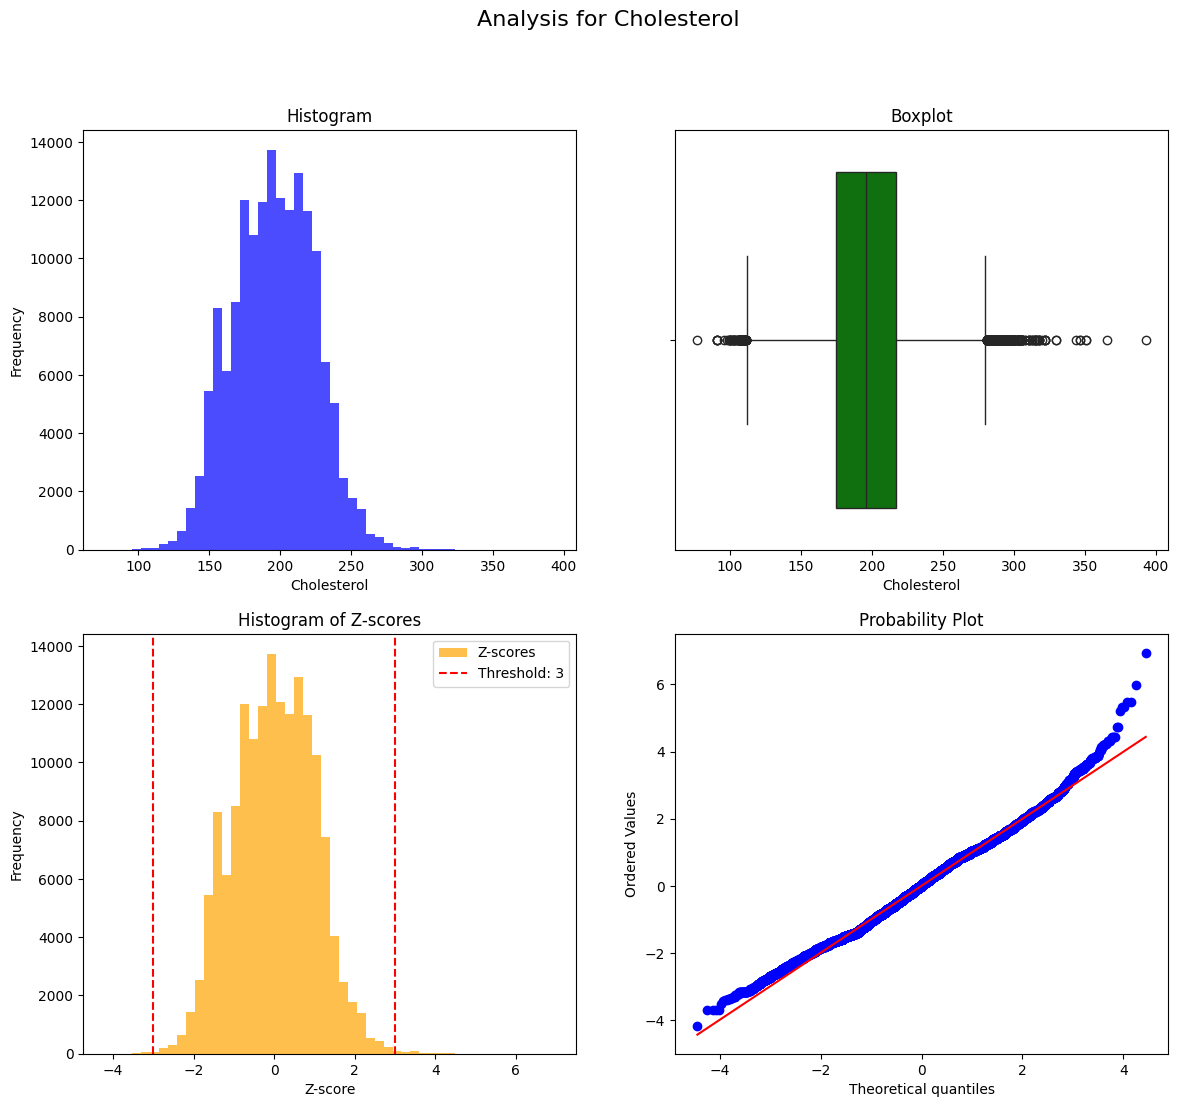

<Figure size 1000x600 with 0 Axes>


Descriptive stats for serum creatinine:
count    159256.000000
mean          0.892764
std           0.179346
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64
Skewness of serum creatinine: 1.5110590703323046
Kurtosis of serum creatinine: 58.93147789429243


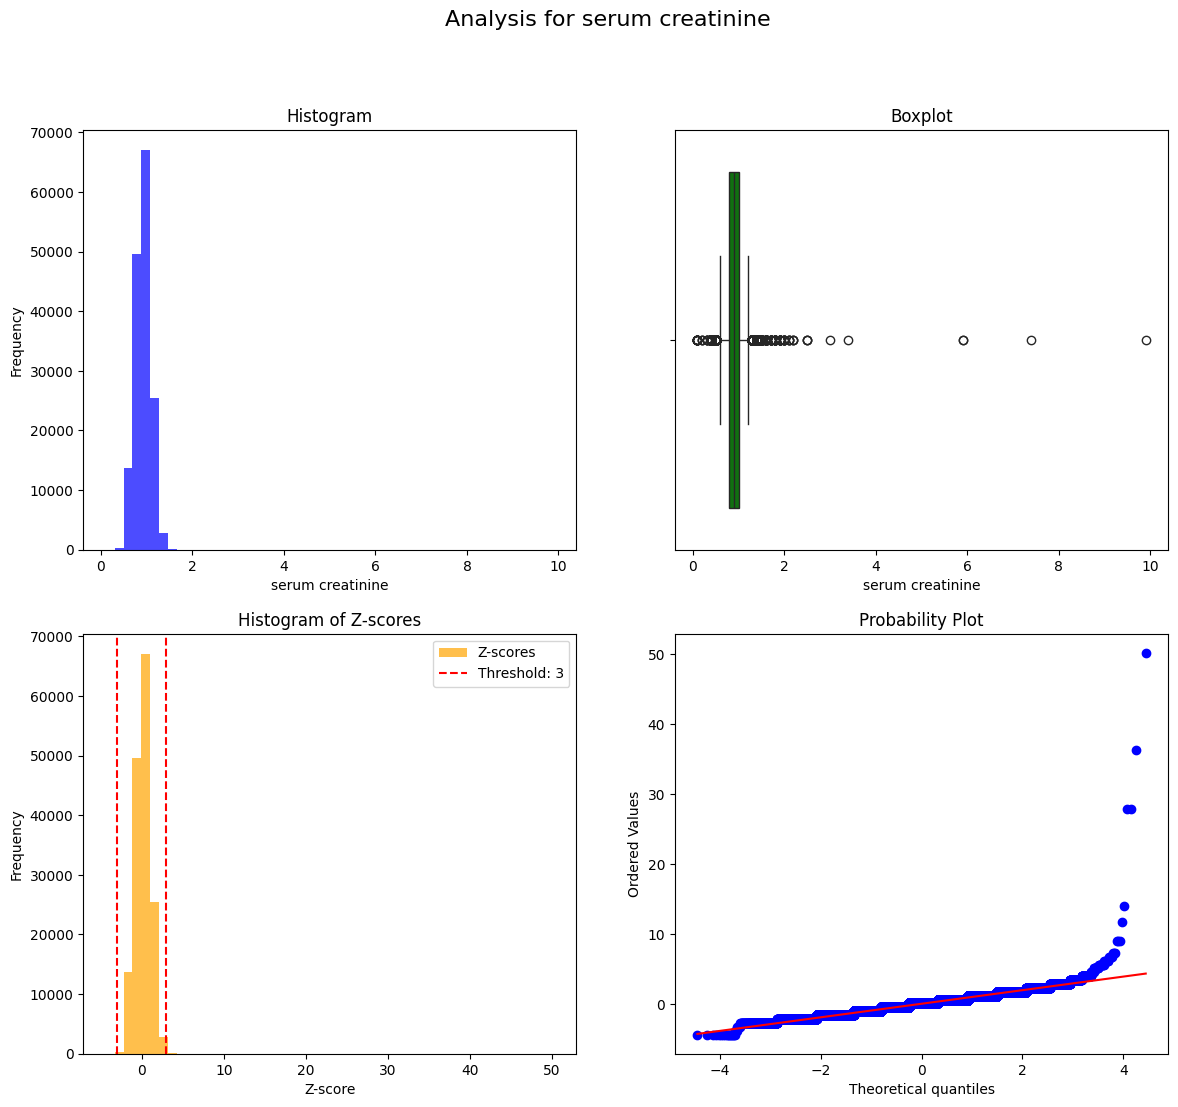

<Figure size 1000x600 with 0 Axes>


Descriptive stats for AST:
count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64
Skewness of AST: 11.59234569223128
Kurtosis of AST: 629.5193319842189


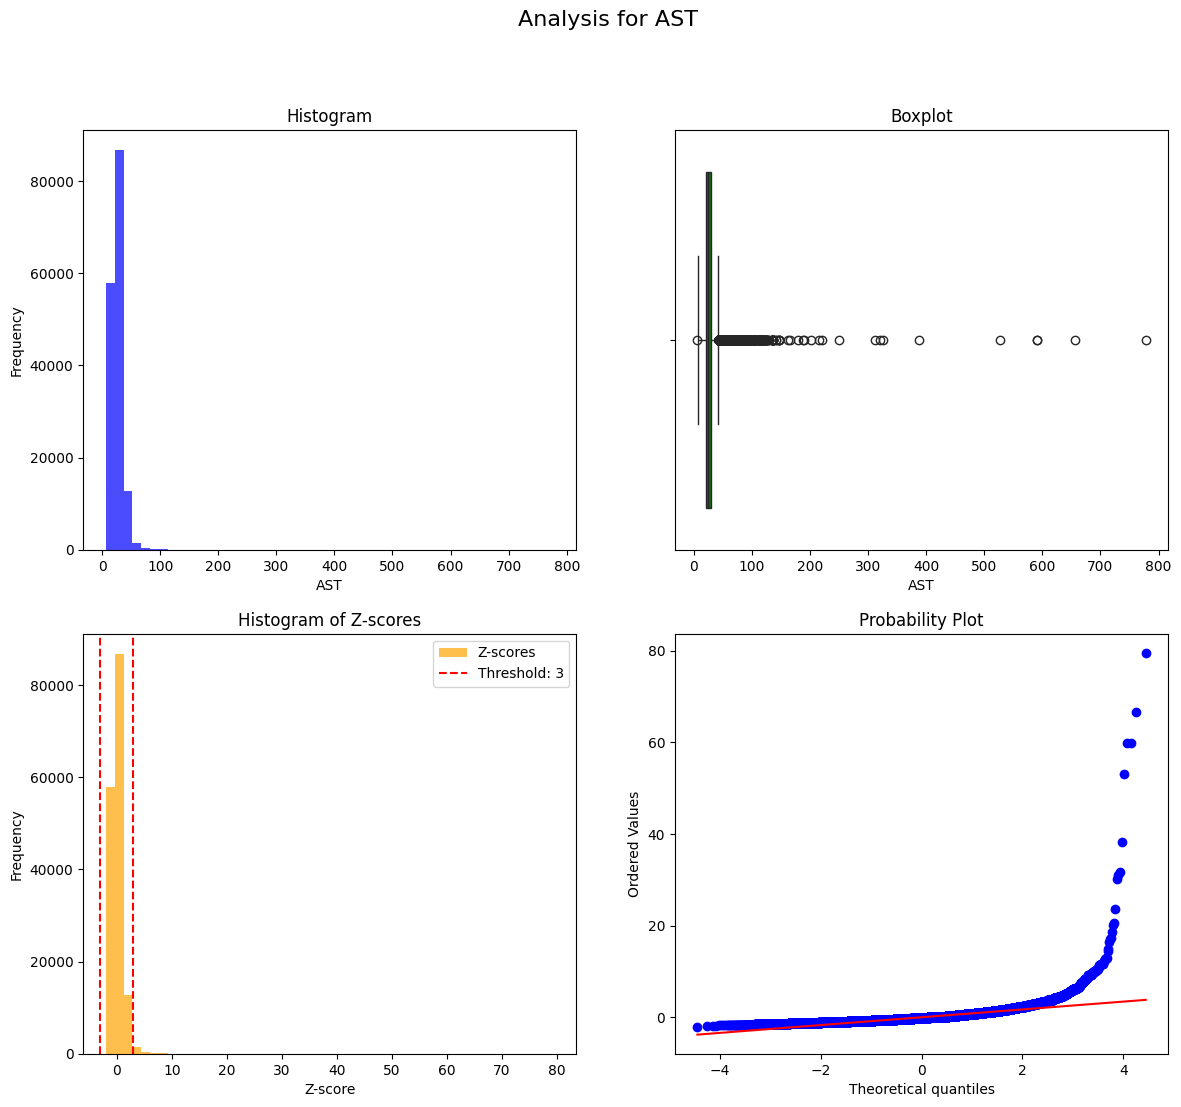

<Figure size 1000x600 with 0 Axes>


Descriptive stats for Gtp:
count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64
Skewness of Gtp: 5.414827255969211
Kurtosis of Gtp: 69.55842824507344


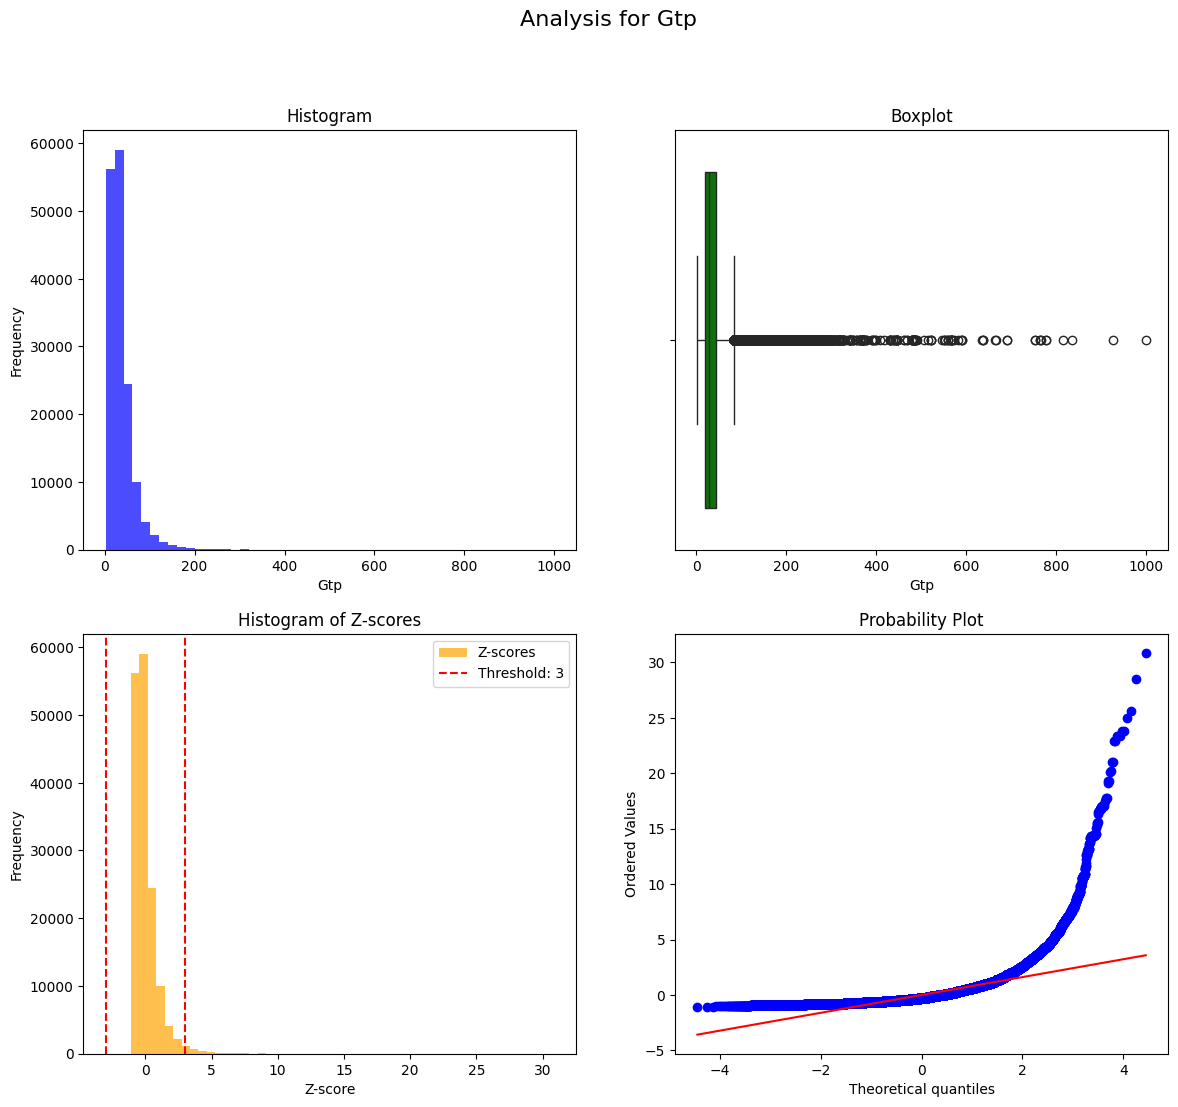

<Figure size 1000x600 with 0 Axes>

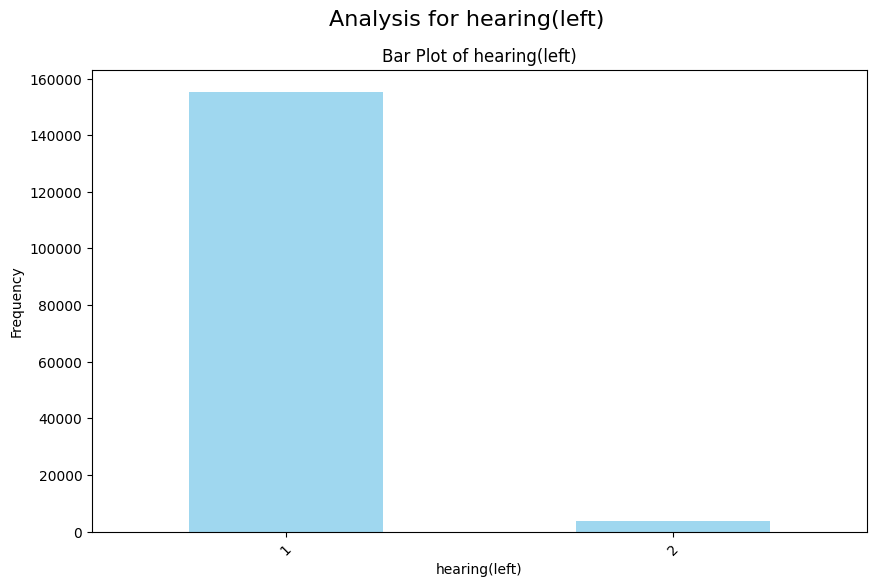


Value counts for hearing(left):
hearing(left)
1    155438
2      3818
Name: count, dtype: int64


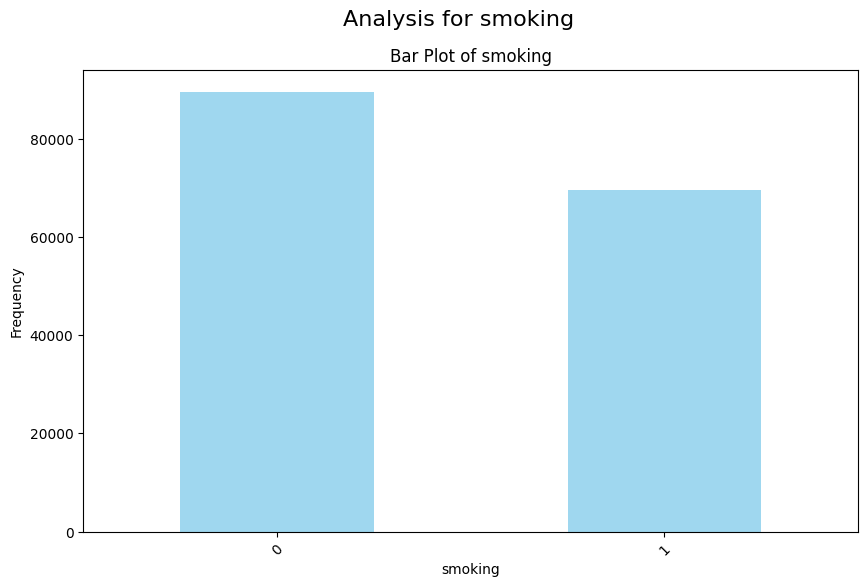


Value counts for smoking:
smoking
0    89603
1    69653
Name: count, dtype: int64


In [89]:

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid of subplots
        fig.suptitle(f"Analysis for {column}", fontsize=16)


        # 1. Histogram
        axes[0, 0].hist(df[column], bins=50, color='blue', alpha=0.7)
        axes[0, 0].set_title("Histogram")
        axes[0, 0].set_xlabel(column)
        axes[0, 0].set_ylabel("Frequency")

        # 2. Boxplot
        # displaying central tendency, spread, and potential outliers
        sns.boxplot(x=df[column], ax=axes[0, 1], color='green')
        axes[0, 1].set_title("Boxplot")

        # 3. Descriptive Statistics
        print(f"\nDescriptive stats for {column}:")
        print(df[column].describe())
        
        # 4. Checking el skewness and kurtosis?
        # Skewness: measuring tiltness/ asymmetry

        # Skewness > 0: Right-skewed
        # Skewness < 0: Left-skewed
        # Skewness ≈ 0: Symmetrical

        # Kurtosis:  sharpness of the peak of the distribution
        
        # Kurtosis > 0: More outliers and heavy tails (leptokurtic).
        # Kurtosis < 0: Fewer outliers and lighter tails (platykurtic).
        # Kurtosis ≈ 0: Normal distribution (mesokurtic).

        print(f"Skewness of {column}: {df[column].skew()}")
        print(f"Kurtosis of {column}: {df[column].kurt()}")


        # 4. Zscore to check outliers
        z_scores = st.zscore(df[column])
        axes[1, 0].hist(z_scores, bins=50, alpha=0.7, color='orange', label='Z-scores')
        axes[1, 0].axvline(3, color='red', linestyle='--', label='Threshold: 3')
        axes[1, 0].axvline(-3, color='red', linestyle='--')
        axes[1, 0].set_title("Histogram of Z-scores")
        axes[1, 0].set_xlabel("Z-score")
        axes[1, 0].set_ylabel("Frequency")
        axes[1, 0].legend()

        # QQ Plot to check normality of z-scores
        plt.figure(figsize=(10, 6))
        st.probplot(z_scores, dist="norm", plot=axes[1,1])
        # # plt.title(f"QQ Plot of Z-scores for {column}")
        plt.show()
    elif df[column].dtype in ['object', 'category']:  # Categorical features
        plt.figure(figsize=(10, 6))
        plt.suptitle(f"Analysis for {column}", fontsize=16)
        df[column].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title(f"Bar Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()

        # Print category counts
        print(f"\nValue counts for {column}:")
        print(df[column].value_counts())



## **DONE**

### Bivariate Analysis

Bivariate data involves two different variables, and the analysis of this type of data focuses on understanding the relationship or association between these two variables.

1. Correlation between each 2 features

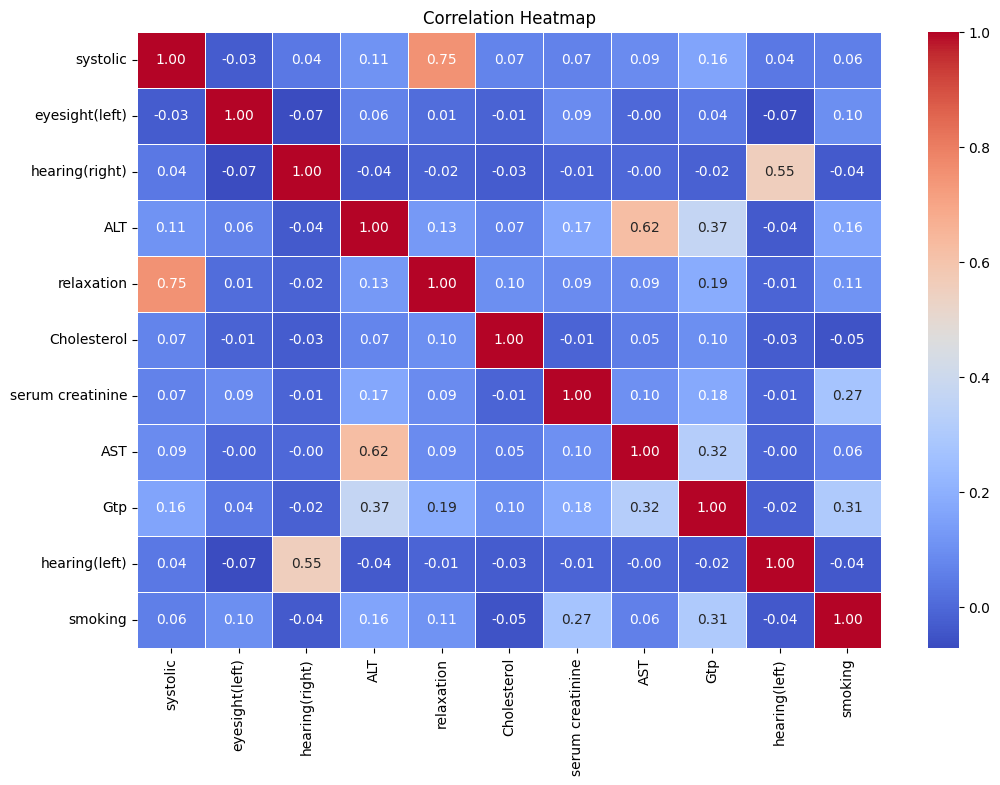

In [90]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

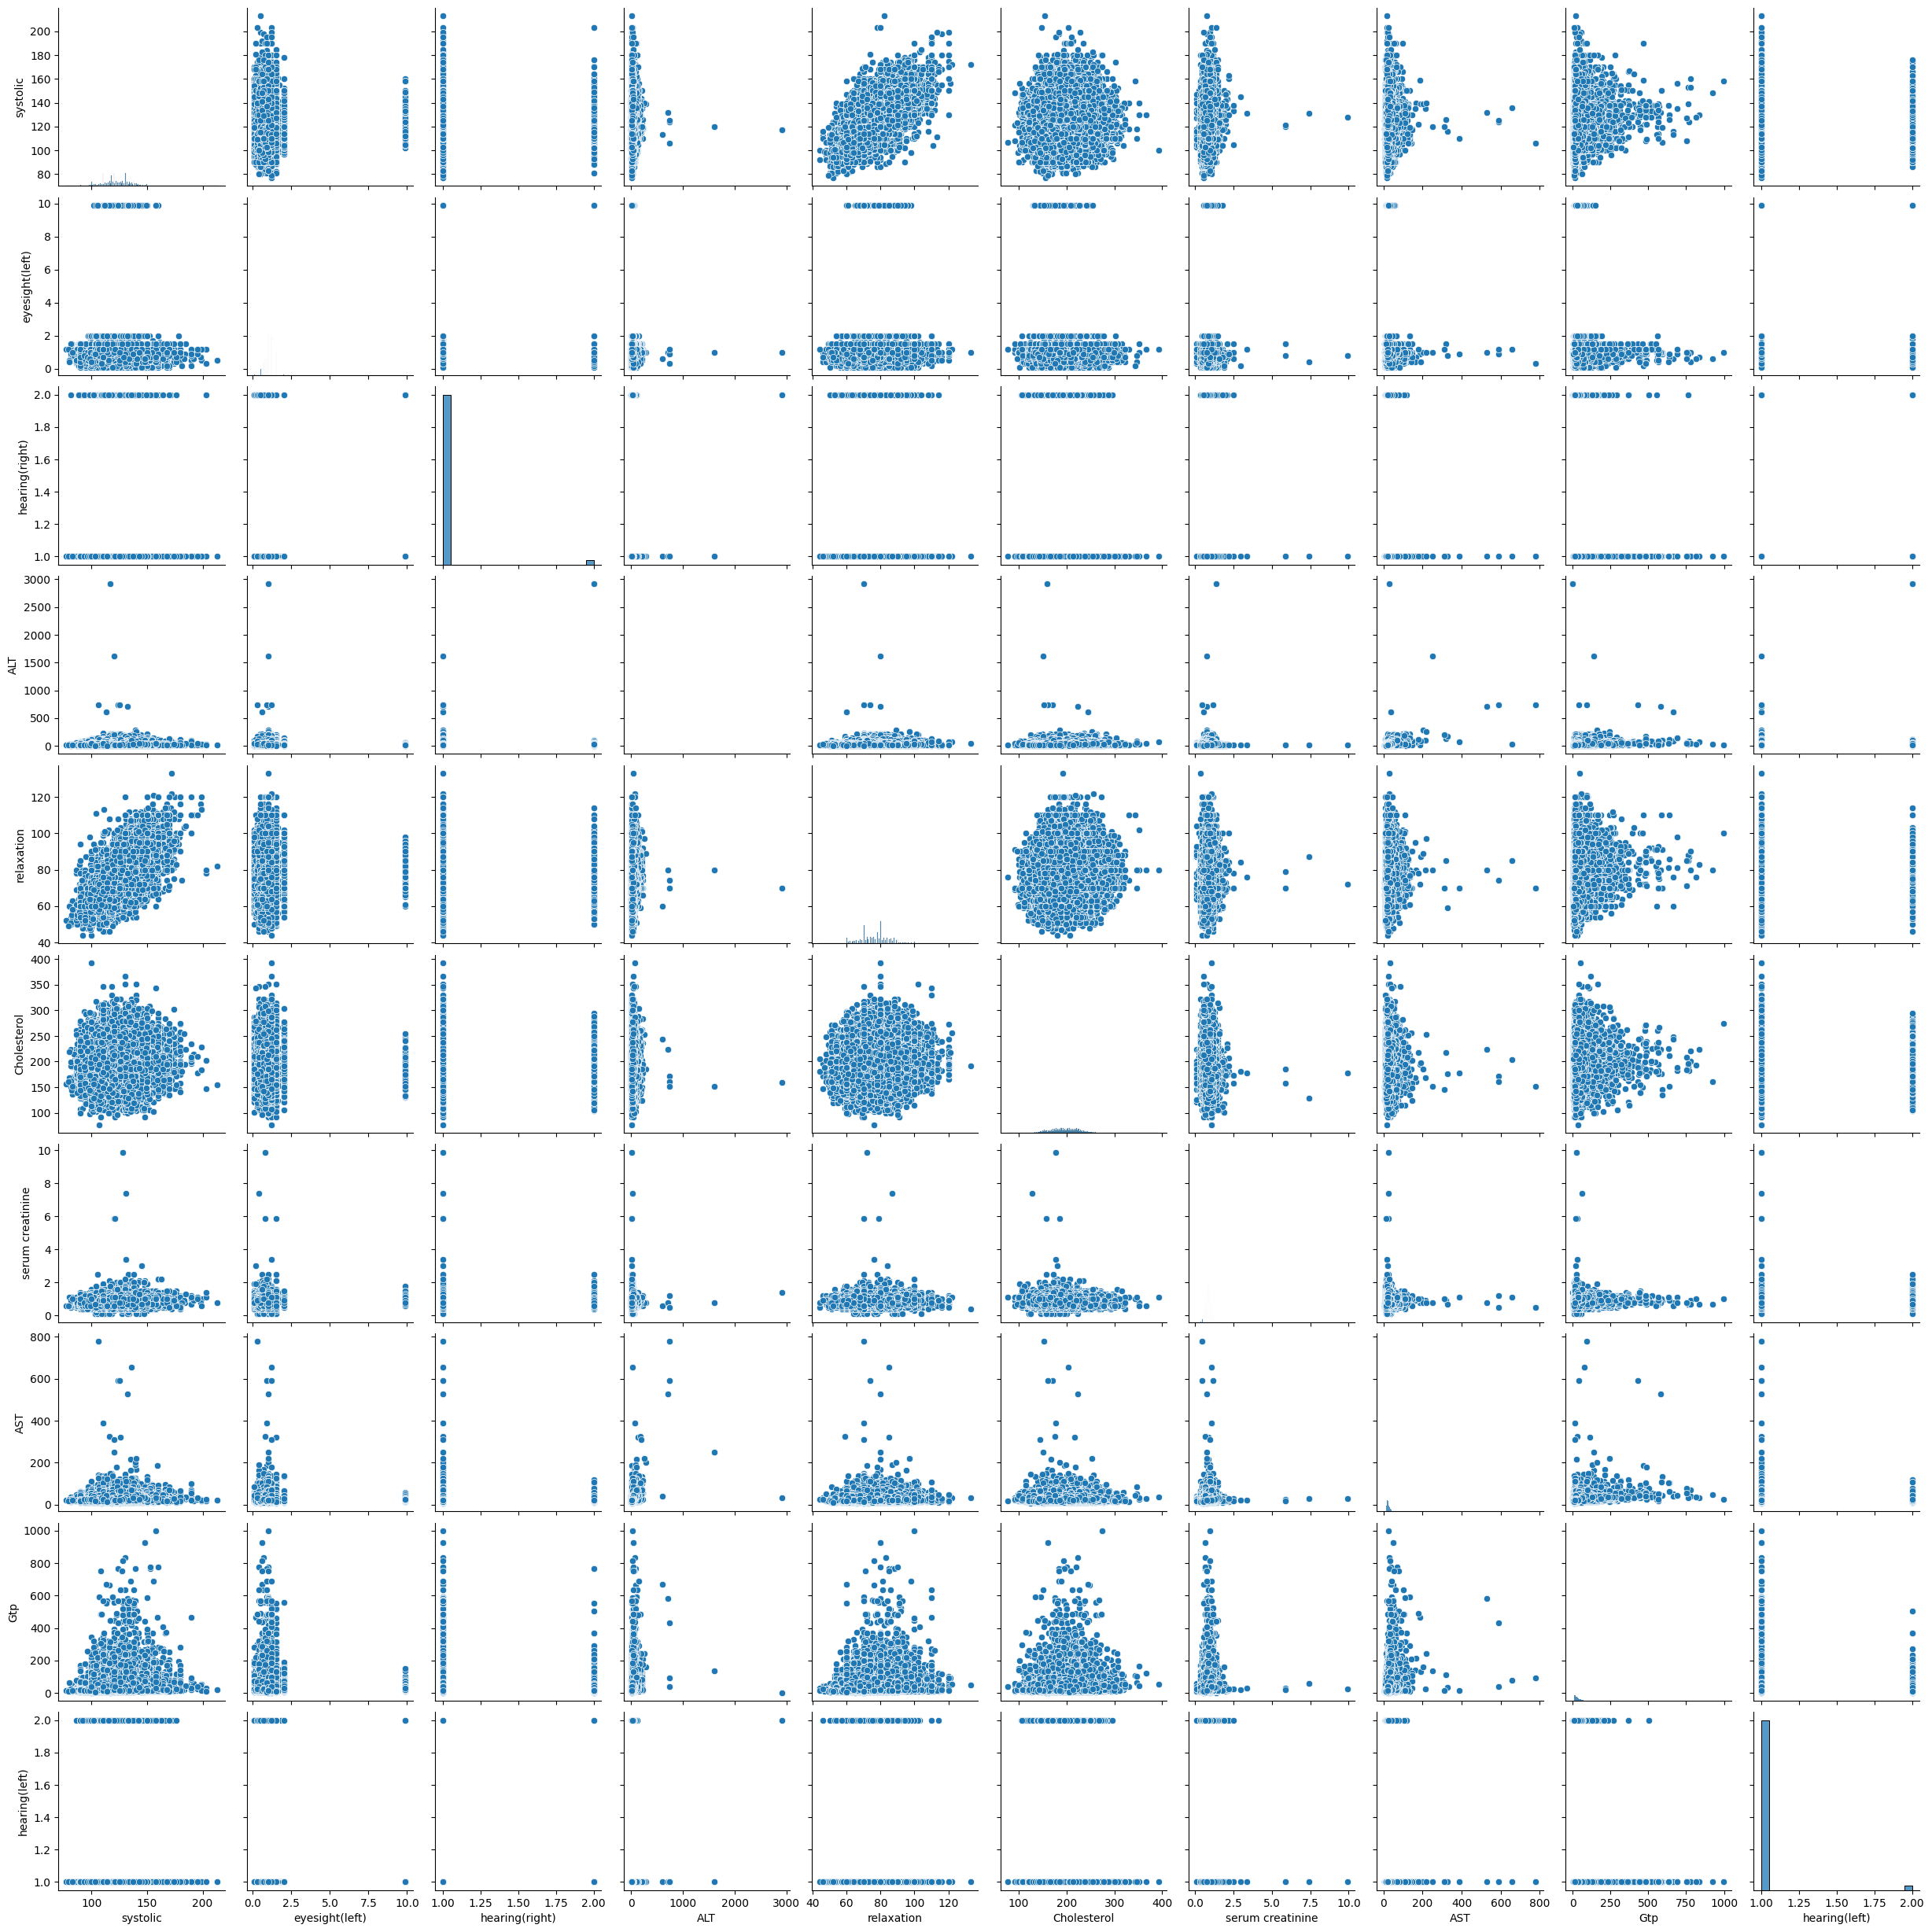

In [46]:
sns.pairplot(df)


Will apply normalization/standardization first so that all ranges are the same
- Chose standardization: will mention the reasons once I finish analysis

In [ ]:
scaler = StandardScaler()
scaler2 = MinMaxScaler()
df_standardized = df.copy()
df_standardized[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['float64', 'int64']).columns])

trying pairplot again

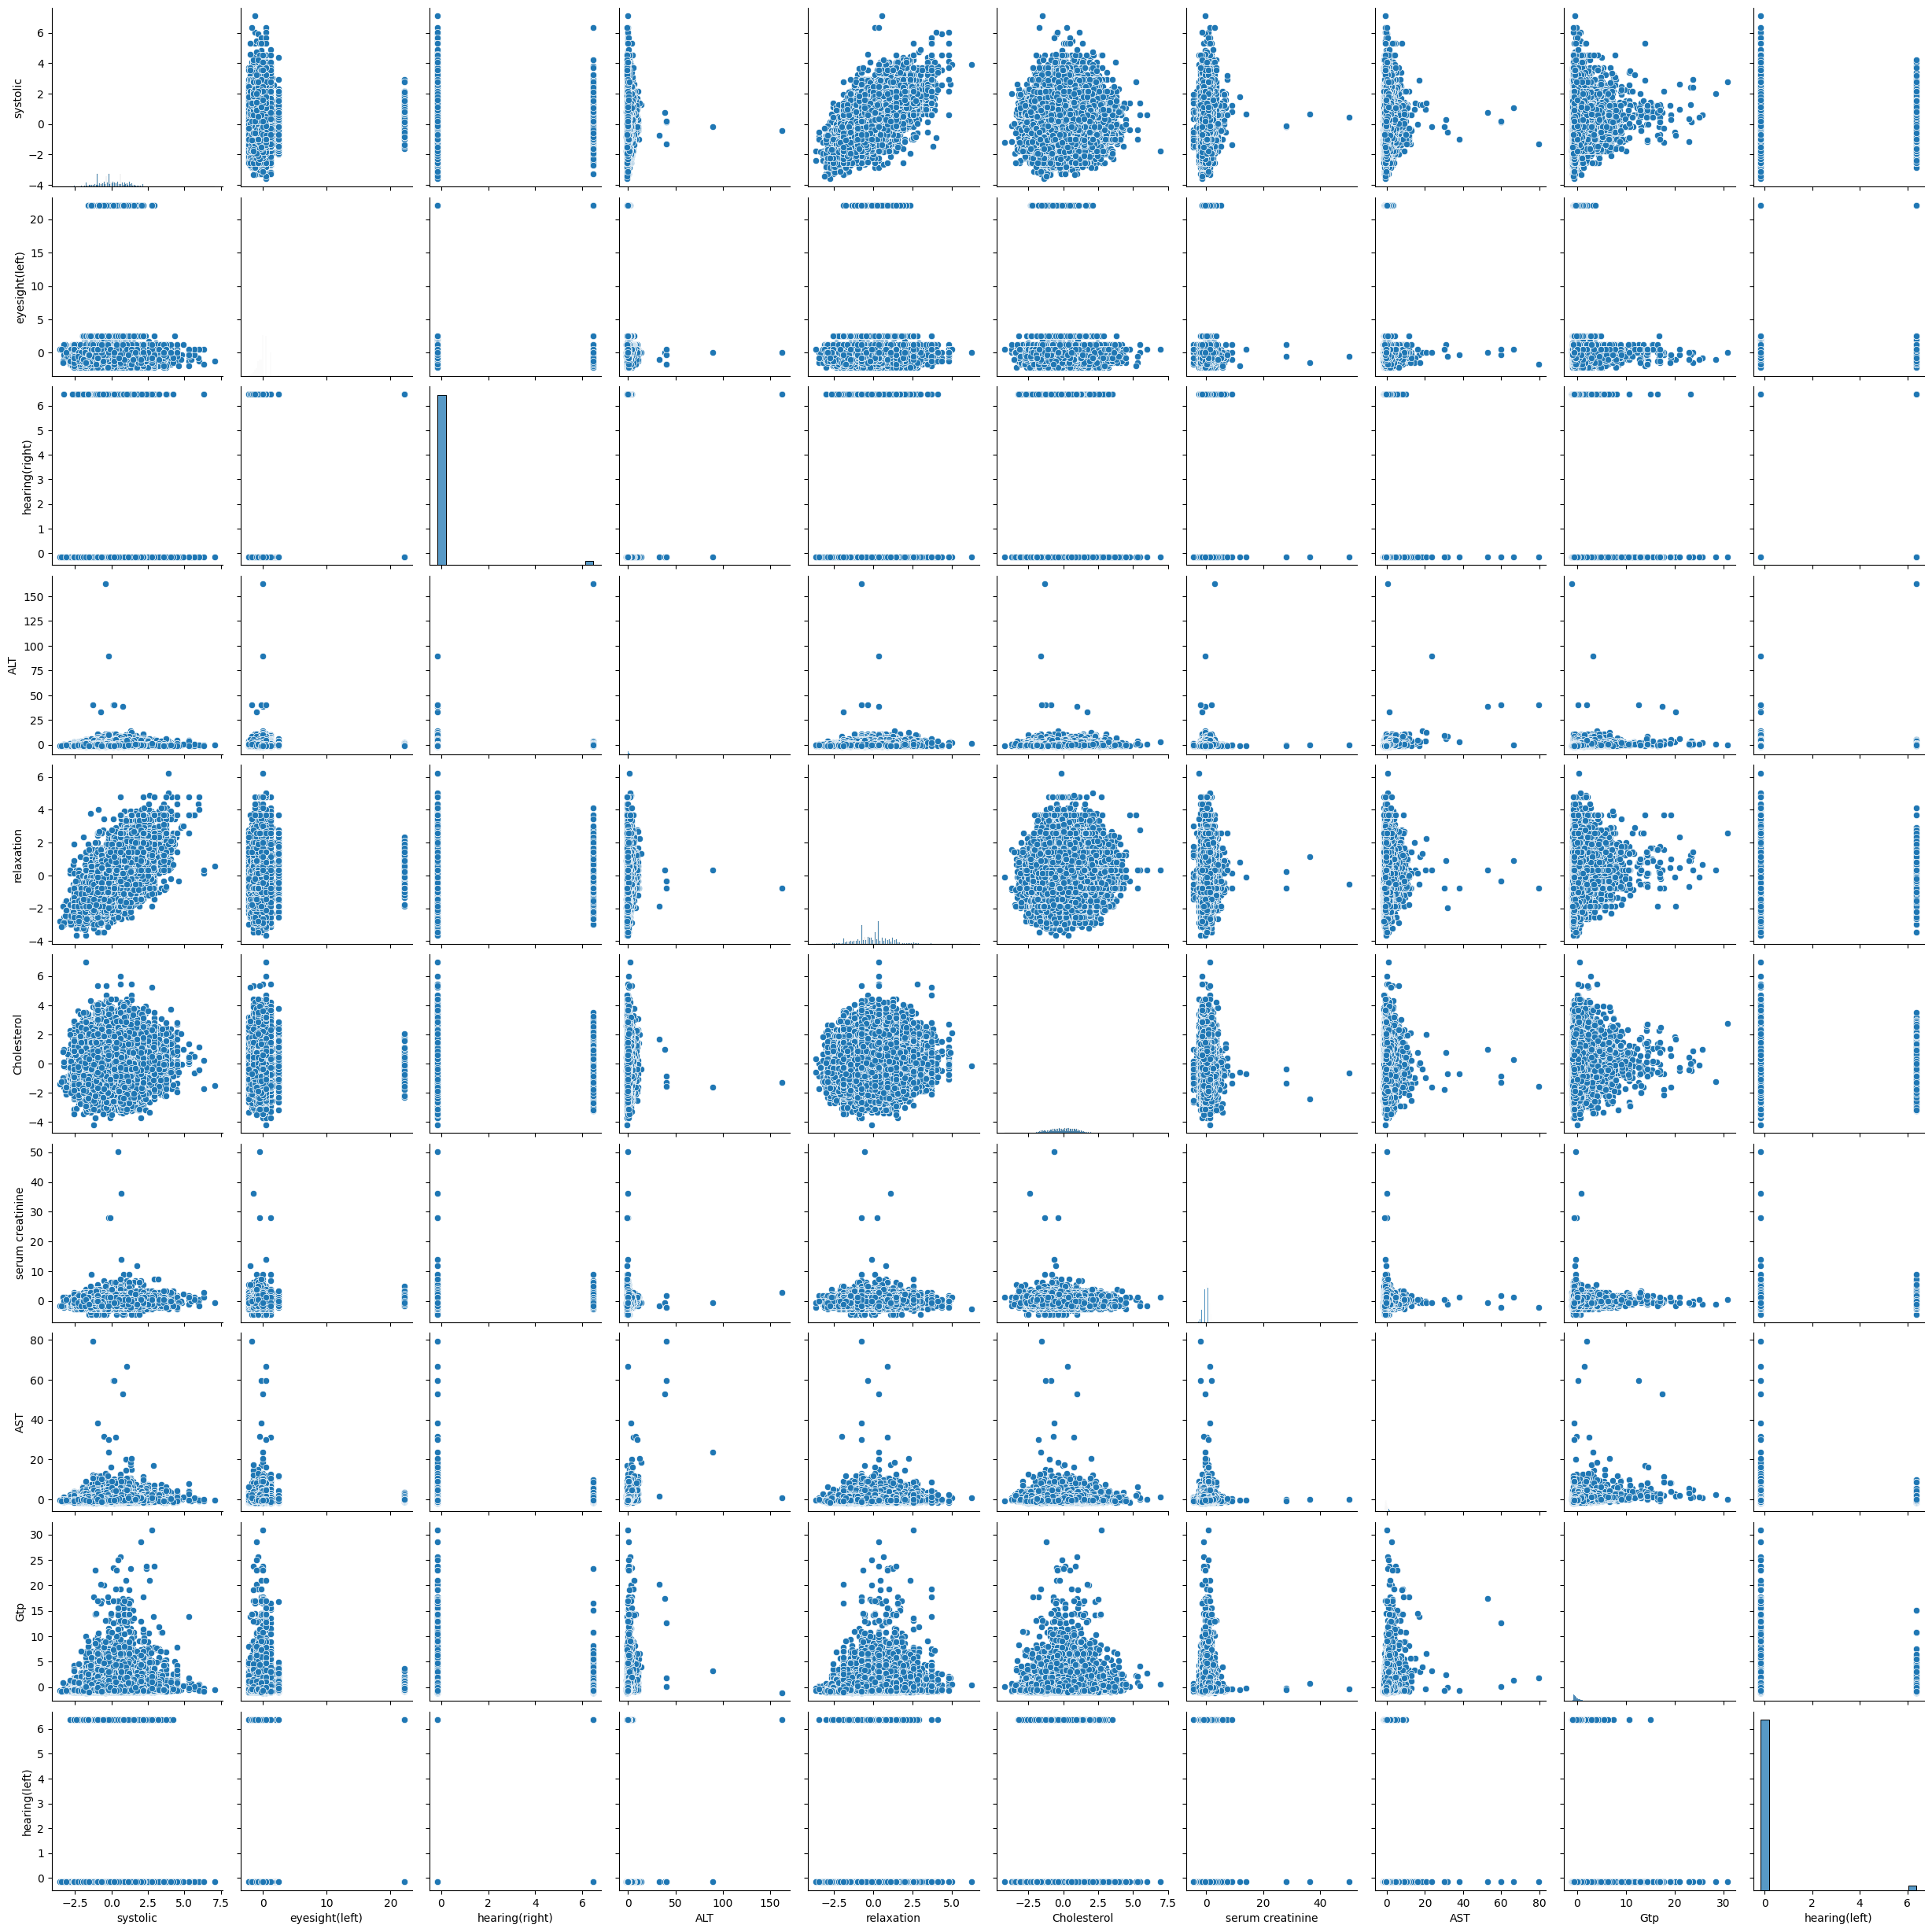

In [52]:
sns.pairplot(df_standardized)


didn't matter

Conclusion: most of the features aren't highly correlated with out target "smoking", the highest were: GTP - serum creatinine

## **DONE**

### Multivariate Analysis

Multivariate analysis explores the relationships between three or more variables simultaneously. It helps to uncover patterns and interactions that cannot be detected in univariate or bivariate analyses.

1. Correlation Heatmap with fixed label 

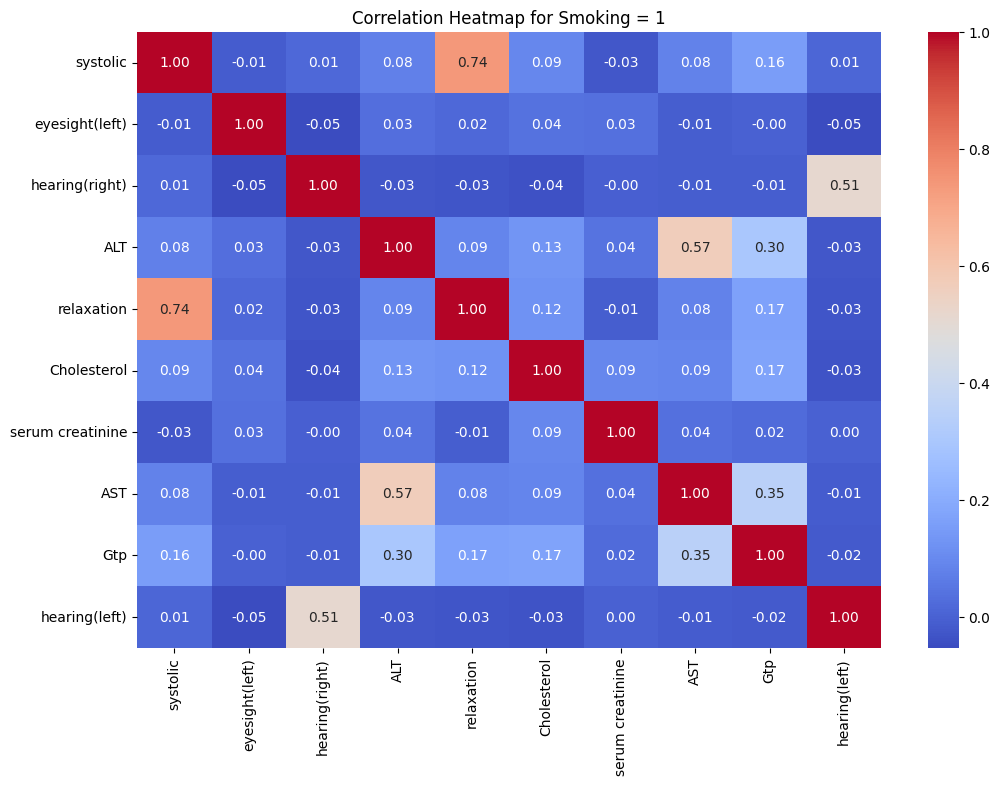

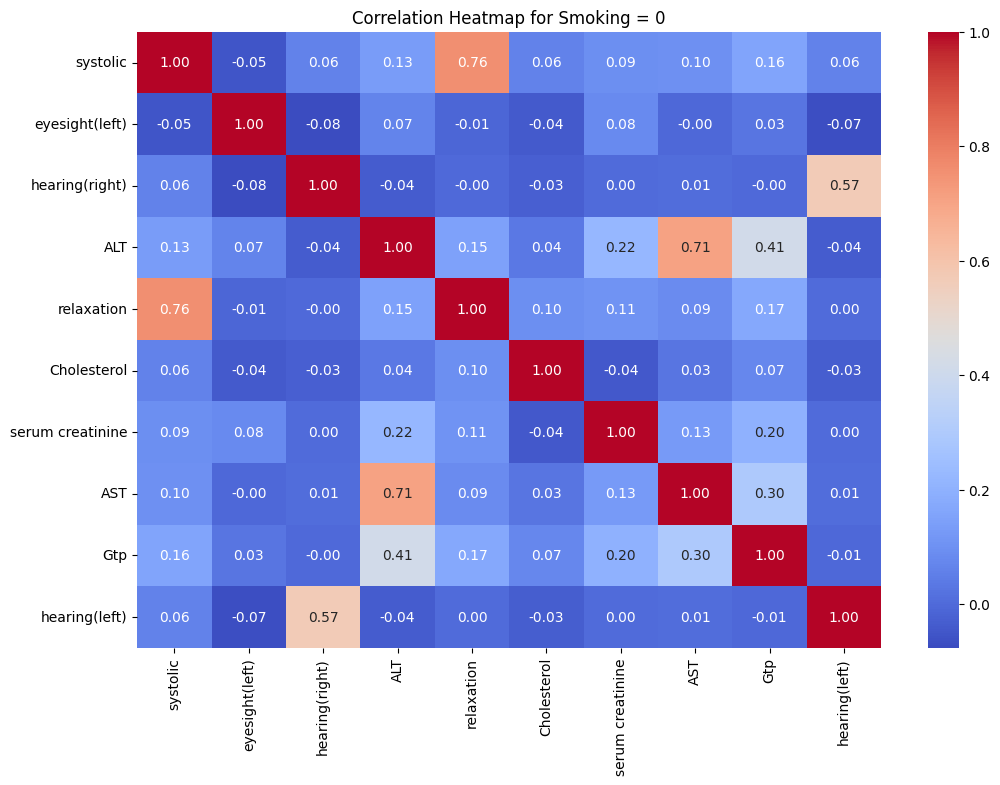

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[df['smoking'] == 1].drop('smoking', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Smoking = 1')
plt.show()

plt.figure(figsize=(12, 8))
# Correcting the syntax here by closing the parentheses properly
sns.heatmap(df[df['smoking'] == 0].drop('smoking', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Smoking = 0')
plt.show()


2. Pairplot with hue (therefore, multivariate)

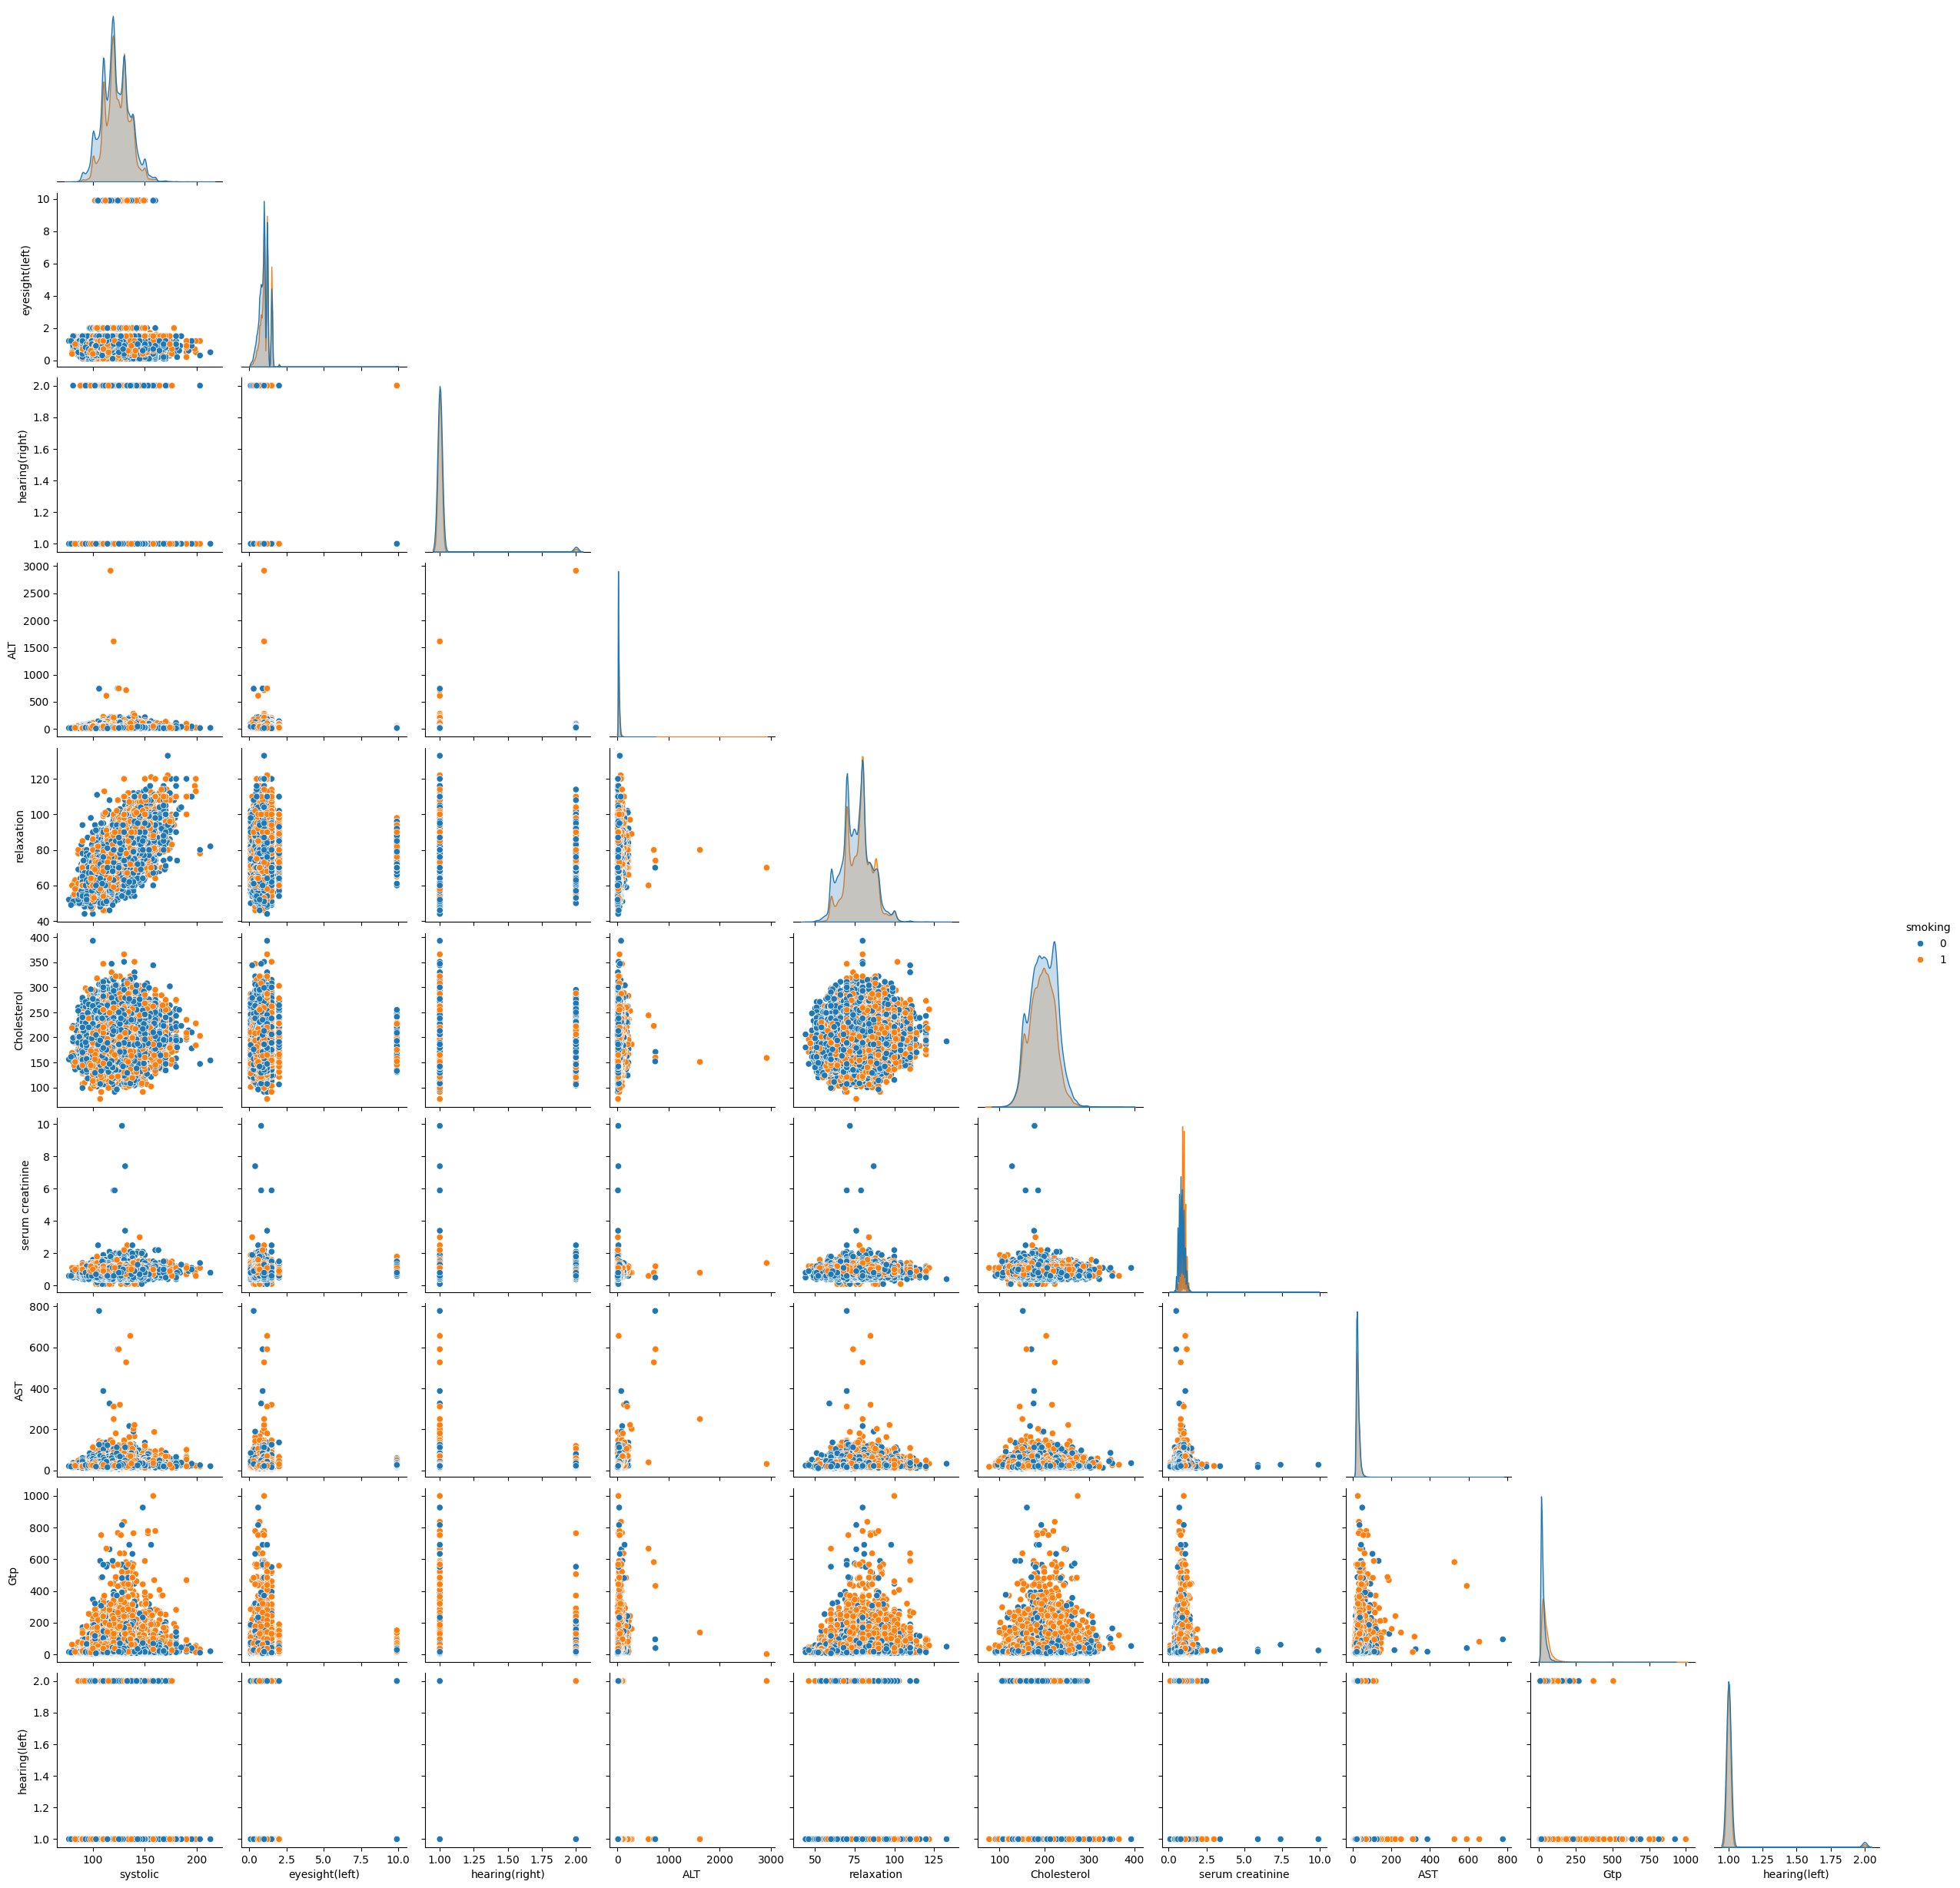

In [ ]:
sns.pairplot(df, hue='smoking', diag_kind='kde', corner=True)
plt.show()

maybe add the dimensionality reduction?/ multivariate outlier detection

## **DONE for now??**

Resources:
1. [Data Analysis](https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/)